# Pruebas PyTesseract

En este notebook quiero probar las capabilidad de OCR de Python con el paquete Pytesseract.

Requiere instalar el exe de esta página y configurar el paquete de Python: https://github.com/UB-Mannheim/tesseract/wiki

Vamos a probar la instruccion simple "image_to_string":

In [11]:
from PIL import Image
import pytesseract
from pathlib import Path

# Hay que indicarle el path al exe de tesseract para Windows
pytesseract.pytesseract.tesseract_cmd = str(Path("C:/Users/dalp/AppData/Local/Programs/Tesseract-OCR/tesseract.exe"))

# Mi directorio de imagenes
imgs = Path.cwd() / "imgs"

print(pytesseract.image_to_string(Image.open(imgs/'fox.jpg')))

The quick brown fox
jumps over the lazy dog.



Coge la imagen correctamente y la separa bien, vamos con algo mas complicado:

In [7]:
print(pytesseract.image_to_string(Image.open(imgs/'alice.jpg')))

ALICE’S ADVENTURES
IN
WONDERLAND

Lewis Carroll

One hot, sunny day, as Alice sits by a riverbank thoroughly bored
and sleepy, she notices a rabbit rushing past her. The ordinary but
nervous rabbit in a waistcoat stops to check his watch. Curious about
this rabbit with a clock, Alice follows it into a big rabbit hole, only
to fall into a deep well that ends in Wonderland. And just like that,
Alice’s drowsy afternoon turns into an adventure as she figures her
way through a world which has its own set of rules. It is a world where
everything is open to negotiation. She can even change the size of her
body according to the food she eats.

Who lives in this strange world? Are there any good creatures who will
help Alice? Fall down the rabbit hole with Alice and discover a tale as
witty as it is interesting.

Classics

K]z lOm Books International Cason



Viene con una lista de lenguajes:

In [12]:
print(pytesseract.get_languages(config=''))

['eng', 'osd']


Para añadir más lenguajes hay que descargar el traineddata de este github y ponerlo en la carpeta tessdata de la instalacion de tesseract

In [13]:
print(pytesseract.get_languages(config=''))

['eng', 'osd', 'spa']


In [14]:
print(pytesseract.image_to_string(Image.open(imgs/'niebla.jpg'), lang='spa'))

ARLOS

RUIZ 84
ON

EL PRÍNCIPE DE
LA NIEBLA

—El nuevo hogar de los Carver

deado de misterio. En él aún se
espira el espíritu de Jacob, el hijo de
Jos antiguos propietarios, que murió
ahogado. Las extrañas circunstancias
_ de esa muerte sólo se empiezan a aclarar
“conla aparición de un diabólico per-
sonaje: el Príncipe de la Niebla, capaz
de conceder cualquier deseo a una per= íi

sona a un alto precio...

1

¡ Www.carlosruizzafon.com



La tipografía está estilizada y el modelo no reconoce cómodamente todo

Podemos obtener las bounding boxes del texto:

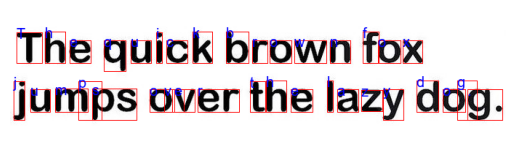

In [21]:
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt


# Cargar imagen
img = Image.open(imgs/"fox.jpg")
draw = ImageDraw.Draw(img)

# Obtener cajas de Tesseract
boxes = pytesseract.image_to_boxes(img)

# Dibujar cajas
for b in boxes.splitlines():
    b = b.split()
    char, x1, y1, x2, y2, _ = b
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    # PIL tiene origen en la esquina superior izquierda, Tesseract en la inferior
    y1_new = img.height - y2
    y2_new = img.height - y1
    draw.rectangle([x1, y1_new, x2, y2_new], outline="red")
    font = ImageFont.truetype("arial.ttf", size=20)
    draw.text((x1, y1_new - 10), char, fill="blue", font=font)

# Mostrar imagen
plt.imshow(img)
plt.axis('off')
plt.show()

Vamos a ver que le ha pasado con el español:

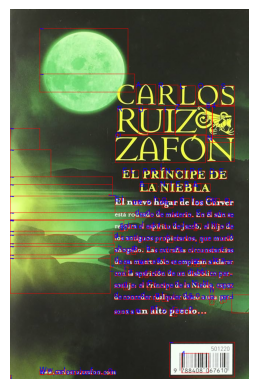

In [22]:
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt


# Cargar imagen
img = Image.open(imgs/"niebla.jpg")
draw = ImageDraw.Draw(img)

# Obtener cajas de Tesseract
boxes = pytesseract.image_to_boxes(img, lang="spa")

# Dibujar cajas
for b in boxes.splitlines():
    b = b.split()
    char, x1, y1, x2, y2, _ = b
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    # PIL tiene origen en la esquina superior izquierda, Tesseract en la inferior
    y1_new = img.height - y2
    y2_new = img.height - y1
    draw.rectangle([x1, y1_new, x2, y2_new], outline="red")
    font = ImageFont.truetype("arial.ttf", size=20)
    draw.text((x1, y1_new - 10), char, fill="blue", font=font)

# Mostrar imagen
plt.imshow(img)
plt.axis('off')
plt.show()